# How to write contents of a DataFrame into a text file in Python

Use np.savetxt() to write the contents of a DataFrame into a text file 
Call pd.DataFrame.to_numpy() to convert a pd.DataFrame to a NumPy array. Use np.savetxt(fname, X, fmt = "%s") with the string "%d" as fmt and the NumPy array as X to write the contents of X into the file fname.

In [2]:
import numpy as np
import pandas as pd

In [5]:
a_dataframe = pd.DataFrame([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
numpy_array = a_dataframe.to_numpy()

np.savetxt("test_file.txt", numpy_array, fmt = "%d")


In [ ]:
with open(test_file.txt,'') as t:
    f.read()


You can just use np.savetxt and access the np attribute .values:


In [ ]:
#np.savetxt(r'c:\data\np.txt', df.values, fmt='%d')

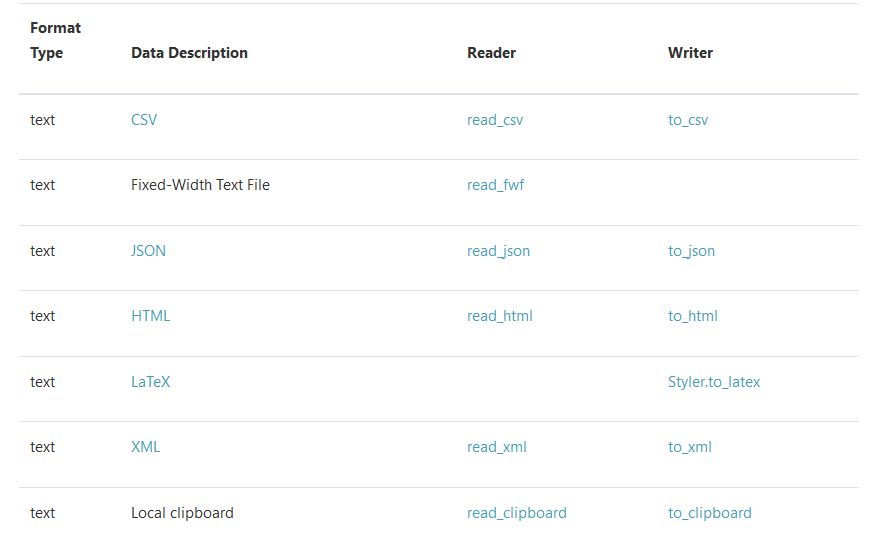

CONT

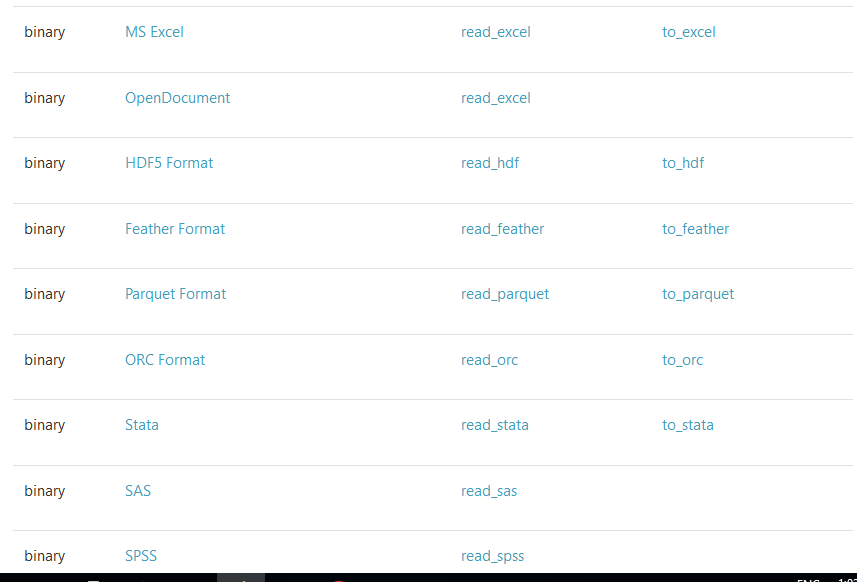

CONT

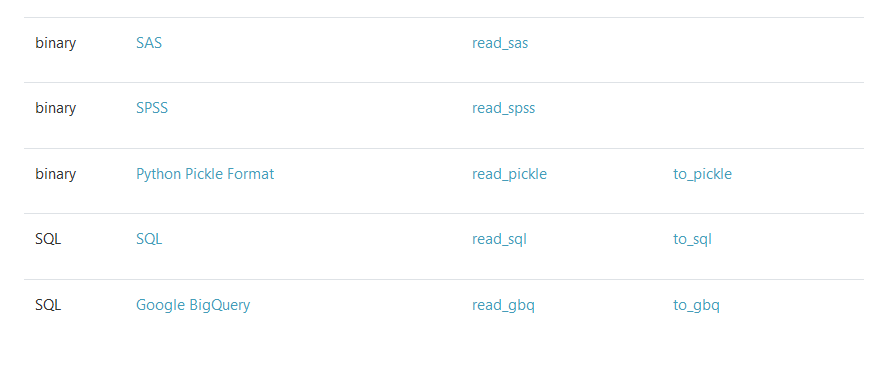

# Reading and Writing Data in Pandas



#### https://python-course.eu/numerical-programming/reading-and-writing-data-in-pandas.php

##### 1. Reading CSV and DSV Files
Pandas offers two ways to read in CSV or DSV files to be precise:

    DataFrame.from_csv
    read_csv

There is no big difference between those two functions, 
e.g. they have different default values in some cases and read_csv has more paramters. 
We will focus on read_csv, because DataFrame.from_csv is kept inside Pandas for reasons of backwards compatibility.

In [ ]:
import pandas as pd

exchange_rates = pd.read_csv("../data1/dollar_euro.txt",
                             sep="\t")
print(exchange_rates)

In [ ]:
# As we can see, read_csv used automatically the first line as the names for the columns.
# It is possible to give other names to the columns. For this purpose, 
# we have to skip the first line by setting the parameter "header" 
# to 0 and we have to assign a list with the column names to the parameter "names":

import pandas as pd

exchange_rates = pd.read_csv("../data1/dollar_euro.txt",
                             sep="\t",
                             header=0,
                             names=["year", "min", "max", "days"])
print(exchange_rates)

Exercise 1

The file "countries_population.csv" is a csv file, containing the population numbers of all countries (July 2014). The delimiter of the file is a space and commas are used to separate groups of thousands in the numbers. The method 'head(n)' of a DataFrame can be used to give out only the first n rows or lines. Read the file into a DataFrame.

In [ ]:
# Solution
pop = pd.read_csv("../data1/countries_population.csv", 
                  header=None,
                  names=["Country", "Population"],
                  index_col=0,
                  quotechar="'", 
                  sep=" ", 
                  thousands=",")
print(pop.head(5))

We can create csv (or dsv) files with the method "to_csv". Before we do this, we will prepare some data to output, which we will write to a file. We have two csv files with population data for various countries. countries_male_population.csv contains the figures of the male populations and countries_female_population.csv correspondingly the numbers for the female populations. We will create a new csv file with the sum:

In [ ]:
column_names = ["Country"] + list(range(2002, 2013))
male_pop = pd.read_csv("../data1/countries_male_population.csv",
                  header=None,
                  index_col=0,
                  names=column_names)

female_pop = pd.read_csv("../data1/countries_female_population.csv",
                         header=None,
                         index_col=0,
                         names=column_names)


population = male_pop + female_pop

population

In [ ]:
population.to_csv("../data1/countries_total_population.csv")

We want to create a new DataFrame with all the information, i.e. female, male and complete population. This means that we have to introduce an hierarchical index. Before we do it on our DataFrame, we will introduce this problem in a simple example:

In [ ]:
import pandas as pd

shop1 = {"foo":{2010:23, 2011:25}, "bar":{2010:13, 2011:29}}
shop2 = {"foo":{2010:223, 2011:225}, "bar":{2010:213, 2011:229}}

shop1 = pd.DataFrame(shop1)
shop2 = pd.DataFrame(shop2)
both_shops = shop1 + shop2
print("Sales of shop1:\n", shop1)
print("\nSales of both shops\n", both_shops)

In [ ]:
shops = pd.concat([shop1, shop2], keys=["one", "two"])
shops

In [ ]:
#We want to swap the hierarchical indices. For this we will use 'swaplevel':
shops.swaplevel()
shops.sort_index(inplace=True)
shops

We will go back to our initial problem with the population figures. 
We will apply the same steps to those DataFrames:

In [ ]:
pop_complete = pd.concat([population.T, 
                          male_pop.T,
                          female_pop.T], 
                          keys=["total", "male", "female"])
df = pop_complete.swaplevel()
df.sort_index(inplace=True)
df[["Austria", "Australia", "France"]]

## Exercise 2

    Read in the dsv file (csv) bundeslaender.txt. Create a new file with the columns 'land', 'area', 'female', 'male', 'population' and 'density' (inhabitants per square kilometres.
    print out the rows where the area is greater than 30000 and the population is greater than 10000
    Print the rows where the density is greater than 300


In [ ]:
lands = pd.read_csv('../data1/bundeslaender.txt', sep=" ")
print(lands.columns.values)

In [ ]:
# swap the columns of our DataFrame:
lands = lands.reindex(columns=['land', 'area', 'female', 'male'])
lands[:2]

In [ ]:
lands.insert(loc=len(lands.columns), 
             column='population', 
             value=lands['female'] + lands['male'])

In [ ]:
lands[:3]

In [ ]:
lands.insert(loc=len(lands.columns), 
             column='density', 
             value=(lands['population'] * 1000 / lands['area']).round(0))

lands[:4]

In [ ]:
print(lands.loc[(lands.area>30000) & (lands.population>10000)])

## Reading and Writing Excel Files

It is also possible to read and write Microsoft Excel files. The Pandas functionalities to read and write Excel files use the modules 'xlrd' and 'openpyxl'. These modules are not automatically installed by Pandas, so you may have to install them manually!

We will use a simple Excel document to demonstrate the reading capabilities of Pandas. The document sales.xls contains two sheets, one called 'week1' and the other one 'week2'.

An Excel file can be read in with the Pandas function "read_excel". This is demonstrated in the following example Python code:

In [ ]:
with pd.ExcelFile("../data1/sales.xls") as excel_file:
    sheet = pd.read_excel(excel_file)
sheet

The document "sales.xls" contains two sheets, but we only have been able to read in the first one with "read_excel". A complete Excel document, which can consist of an arbitrary number of sheets, can be completely read in like this:

In [ ]:
docu = {}
for sheet_name in excel_file.sheet_names:
    docu[sheet_name] = excel_file.parse(sheet_name)

for sheet_name in docu:
    print("\n" + sheet_name + ":\n", docu[sheet_name])

In [ ]:
# We will calculate now the avarage sales numbers of the two weeks:

average = docu["week1"].copy()
average["Sales"] = (docu["week1"]["Sales"] + docu["week2"]["Sales"]) / 2
print(average)



We will save the DataFrame 'average' in a new document with 'week1' and 'week2' as additional sheets as well:

In [ ]:
with pd.ExcelWriter('../data1/sales_average.xlsx') as writer:
    docu['week1'].to_excel(writer,'week1')
    docu['week2'].to_excel(writer,'week2')
    average.to_excel(writer,'average')
    writer.save()